# 1. Importing tools and data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
data=pd.read_csv('alldata.csv')

# 2. Taking a look at the data

In [4]:
data

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


<AxesSubplot:>

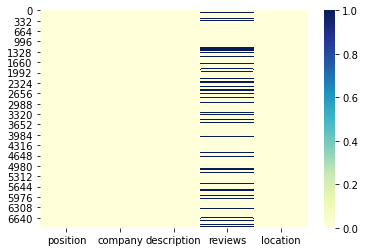

In [6]:
# have a overlook about null values in the data
sns.heatmap(data.isnull(),cmap='YlGnBu')

# 3. Cleaning the data

In [7]:
# to check where is the duplicate value
pd.concat([data.drop_duplicates(),data.drop_duplicates(keep=False)]).drop_duplicates(keep=False)

,position,company,description,reviews,location
302,NaN,NaN,NaN,NaN,NaN


In [8]:
data.iloc[302]

position       NaN
company        NaN
description    NaN
reviews        NaN
location       NaN
Name: 302, dtype: object

In [9]:
data.dropna(axis='index', how='all')

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


##### Dropped 11 rows 

# 4. Enriching the data


**COLUMN POSITION**

In [10]:
#make all lower case
data['position']=data['position'].str.lower()

In [11]:
data['position'].unique()

array(['development director',
       'an ostentatiously-excitable principal research assistant to chief scientist',
       'data scientist', ..., 'data developer / machine learning analyst',
       'intern scientist', 'principal data scientist, deep learning'],
      dtype=object)

In [12]:
count = data['position'].value_counts()
count

data scientist                                                     355
senior data scientist                                               98
research analyst                                                    66
data engineer                                                       63
machine learning engineer                                           56
                                                                  ... 
senior scientist i or ii, nonclinical pharmacology & toxicology      1
postdoctoral scientist-immunology                                    1
temporary sr. statistical programmer                                 1
sr software dev engineer                                             1
data scientist - cancer dependency map                               1
Name: position, Length: 5216, dtype: int64

In [13]:
def categorize(text):
    try:
        if 'scient' in text:
            return 'Scientist'
        elif 'analy' in text:
            return 'Analyst'
        elif 'engineer' in text:
            return 'Engineer'
        elif 'resear' in text:
            return 'Researcher'
        elif 'profess' in text:
            return 'Professor'
    except TypeError:
        return np.NaN
data['PosCat']=data['position'].apply(categorize)

In [14]:
data['PosCat'].value_counts()

Scientist     2663
Engineer      1185
Analyst       1033
Researcher     356
Professor       10
Name: PosCat, dtype: int64

In [15]:
data

,position,company,description,reviews,location,PosCat
0,development director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301",None
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",Scientist
2,data scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",Scientist
3,data analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Analyst
4,assistant professor -tt - signal processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Professor
...,...,...,...,...,...,...
6959,data developer / machine learning analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA",Analyst
6960,scientist i,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA",Scientist
6961,intern scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA",Scientist
6962,senior data & applied scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA",Scientist


In [16]:
Pos_Count = data['PosCat'].value_counts()

Text(0.5, 1.0, 'Positions')

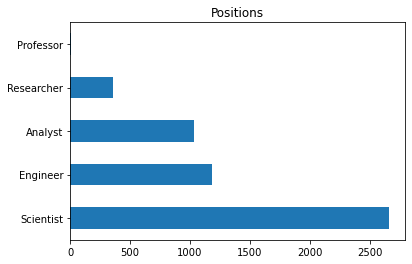

In [17]:
ax=Pos_Count.plot.barh(x=[0], y=[1])
plt.title('Positions')


In [18]:
def seniority(text):
    try:
        if ('junior' in text) | ('intern' in text):
            return 'Junior'
        elif 'senior' in text:
            return 'Senior'
        elif ('assist' in text) | ('associate' in text):
            return 'Junior'
        elif ('principal' in text) | ('lead' in text):
            return 'Intermediate'
        elif 'manager' in text:
            return 'Senior'
        else:
            return 'Intermediate'
    except TypeError:
        return np.NaN

data['Seniority']=data['position'].apply(seniority)
data

,position,company,description,reviews,location,PosCat,Seniority
0,development director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301",None,Intermediate
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",Scientist,Junior
2,data scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",Scientist,Intermediate
3,data analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Analyst,Intermediate
4,assistant professor -tt - signal processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Professor,Junior
...,...,...,...,...,...,...,...
6959,data developer / machine learning analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA",Analyst,Intermediate
6960,scientist i,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA",Scientist,Intermediate
6961,intern scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA",Scientist,Junior
6962,senior data & applied scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA",Scientist,Senior


In [19]:
Seniority_Rank = data['Seniority'].value_counts()

In [20]:
Seniority_Rank

Intermediate    4857
Senior          1493
Junior           603
Name: Seniority, dtype: int64

Text(0.5, 1.0, 'Seniority')

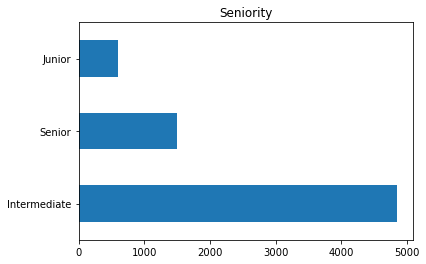

In [21]:
ax=Seniority_Rank.plot.barh(x=[0], y=[1])
plt.title('Seniority')


**COLUMN STATE**

In [22]:
def state(text):
    try:
        if 'WA' in text:
            return 'WA'
        elif 'NY' in text:
            return 'NY'
        elif 'CA' in text:
            return 'CA'
        elif 'MA' in text:
            return 'MA'
        elif 'GA' in text:
            return 'GA'
        elif 'TX' in text:
            return 'TX'
        elif 'CO' in text:
            return 'CO'
        elif 'IL' in text:
            return 'IL'
        elif 'DC' in text:
            return 'DC'
        elif 'NJ' in text:
            return 'NJ'
        else:
            return 'OTHER'
    except TypeError:
        return np.NaN

data['state']=data['location'].apply(state)
data

,position,company,description,reviews,location,PosCat,Seniority,state
0,development director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301",None,Intermediate,GA
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA",Scientist,Junior,GA
2,data scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA",Scientist,Intermediate,GA
3,data analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Analyst,Intermediate,GA
4,assistant professor -tt - signal processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Professor,Junior,GA
...,...,...,...,...,...,...,...,...
6959,data developer / machine learning analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA",Analyst,Intermediate,CA
6960,scientist i,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA",Scientist,Intermediate,CA
6961,intern scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA",Scientist,Junior,CA
6962,senior data & applied scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA",Scientist,Senior,CA


In [23]:
data['state'].value_counts()

CA    2152
MA    1323
WA     935
NY     926
IL     471
DC     340
GA     269
CO     251
TX     218
NJ      68
Name: state, dtype: int64

**COLUMN DESCRIPTION**

In [24]:
data['description']=data['description'].str.lower()
data

,position,company,description,reviews,location,PosCat,Seniority,state
0,development director,ALS TDI,development director\nals therapy development ...,NaN,"Atlanta, GA 30301",None,Intermediate,GA
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"job description\n\n""the road that leads to acc...",NaN,"Atlanta, GA",Scientist,Junior,GA
2,data scientist,Xpert Staffing,"growing company located in the atlanta, ga are...",NaN,"Atlanta, GA",Scientist,Intermediate,GA
3,data analyst,Operation HOPE,department: program operationsposition locatio...,44.0,"Atlanta, GA 30303",Analyst,Intermediate,GA
4,assistant professor -tt - signal processing & ...,Emory University,description\nthe emory university department o...,550.0,"Atlanta, GA",Professor,Junior,GA
...,...,...,...,...,...,...,...,...
6959,data developer / machine learning analyst,NetApp,are you data-driven? we at netapp believe in t...,574.0,"Sunnyvale, CA",Analyst,Intermediate,CA
6960,scientist i,"Pharmacyclics, an Abbvie Company",pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA",Scientist,Intermediate,CA
6961,intern scientist,Oath Inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"Sunnyvale, CA",Scientist,Junior,CA
6962,senior data & applied scientist,Microsoft,we are the bing core relevance team responsibl...,4618.0,"Sunnyvale, CA",Scientist,Senior,CA


In [25]:
def industry(text):
    try:
        if ('finan' in text) | ('investment' in text)|('bank' in text):
            return 'Financial'
        elif ('medical' in text) | ('health' in text):
            return 'Medical'
        elif ('logistic' in text) | ('supply' in text):
            return 'Logistics'
        elif ('artificial' in text) | ('intelligen' in text):
            return 'HighTech'
        elif 'consultant' in text:
            return 'Consultant'
        elif ('market' in text)|('sale' in text):
            return 'Marketing'
        elif ('school' in text)|('university' in text)|('research' in text)|('studies' in text):
            return "Education"
        elif ('media' in text) | ('entertain' in text)| ('adver' in text)|('digital' in text)|('magazine' in text):
            return 'Media'
        elif 'manufact' in text:
            return 'Manufacturer'
        elif 'bio' in text:
            return 'BIO'
        elif 'secur' in text:
            return 'Security'
        elif 'insurance' in text:
            return 'Insurance'
        else:
            return 'unknown'
    except TypeError:
        return np.NaN

data['Industry']=data['description'].apply(industry)
data

,position,company,description,reviews,location,PosCat,Seniority,state,Industry
0,development director,ALS TDI,development director\nals therapy development ...,NaN,"Atlanta, GA 30301",None,Intermediate,GA,Marketing
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"job description\n\n""the road that leads to acc...",NaN,"Atlanta, GA",Scientist,Junior,GA,Logistics
2,data scientist,Xpert Staffing,"growing company located in the atlanta, ga are...",NaN,"Atlanta, GA",Scientist,Intermediate,GA,Logistics
3,data analyst,Operation HOPE,department: program operationsposition locatio...,44.0,"Atlanta, GA 30303",Analyst,Intermediate,GA,Financial
4,assistant professor -tt - signal processing & ...,Emory University,description\nthe emory university department o...,550.0,"Atlanta, GA",Professor,Junior,GA,Medical
...,...,...,...,...,...,...,...,...,...
6959,data developer / machine learning analyst,NetApp,are you data-driven? we at netapp believe in t...,574.0,"Sunnyvale, CA",Analyst,Intermediate,CA,Financial
6960,scientist i,"Pharmacyclics, an Abbvie Company",pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA",Scientist,Intermediate,CA,Medical
6961,intern scientist,Oath Inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"Sunnyvale, CA",Scientist,Junior,CA,Financial
6962,senior data & applied scientist,Microsoft,we are the bing core relevance team responsibl...,4618.0,"Sunnyvale, CA",Scientist,Senior,CA,Medical


In [26]:
data['Industry'].value_counts()

Medical         2162
Financial       1633
Education        880
HighTech         663
Marketing        632
unknown          331
Logistics        280
Media            109
Consultant       107
BIO               81
Manufacturer      38
Security          31
Insurance          6
Name: Industry, dtype: int64

In [27]:
def degree(text):
    try:
        if ('phd' in text):
            return 'PhD'
        elif ('master' in text)|('ms' in text):
            return 'Master'
        elif ('bachelor' in text)|('bs' in text)|('graduate' in text)|('degree' in text):
            return 'Bachelor'
        else:
            return 'unknown'
    except TypeError:
        return np.NaN
    
data['HighestDegree']=data['description'].apply(degree)
data

,position,company,description,reviews,location,PosCat,Seniority,state,Industry,HighestDegree
0,development director,ALS TDI,development director\nals therapy development ...,NaN,"Atlanta, GA 30301",None,Intermediate,GA,Marketing,Bachelor
1,an ostentatiously-excitable principal research...,The Hexagon Lavish,"job description\n\n""the road that leads to acc...",NaN,"Atlanta, GA",Scientist,Junior,GA,Logistics,Master
2,data scientist,Xpert Staffing,"growing company located in the atlanta, ga are...",NaN,"Atlanta, GA",Scientist,Intermediate,GA,Logistics,Master
3,data analyst,Operation HOPE,department: program operationsposition locatio...,44.0,"Atlanta, GA 30303",Analyst,Intermediate,GA,Financial,Master
4,assistant professor -tt - signal processing & ...,Emory University,description\nthe emory university department o...,550.0,"Atlanta, GA",Professor,Junior,GA,Medical,PhD
...,...,...,...,...,...,...,...,...,...,...
6959,data developer / machine learning analyst,NetApp,are you data-driven? we at netapp believe in t...,574.0,"Sunnyvale, CA",Analyst,Intermediate,CA,Financial,Master
6960,scientist i,"Pharmacyclics, an Abbvie Company",pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA",Scientist,Intermediate,CA,Medical,Master
6961,intern scientist,Oath Inc,"oath, a subsidiary of verizon, is a values-led...",5.0,"Sunnyvale, CA",Scientist,Junior,CA,Financial,PhD
6962,senior data & applied scientist,Microsoft,we are the bing core relevance team responsibl...,4618.0,"Sunnyvale, CA",Scientist,Senior,CA,Medical,Master


In [28]:
data['HighestDegree'].value_counts()

Master      4879
PhD         1724
Bachelor     228
unknown      122
Name: HighestDegree, dtype: int64

# 5. Visualizing the data

In [29]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

**POSITIONS AND STATE**

In [30]:
# CA has most companies so of course it has most scientists/master etc
data[data['PosCat']=='Scientist'].groupby(data['state']).count()

,position,company,description,reviews,location,PosCat,Seniority,state,Industry,HighestDegree
state,,,,,,,,,,
CA,999,999,999,684,999,999,999,999,999,999
CO,23,23,23,12,23,23,23,23,23,23
DC,87,87,87,57,87,87,87,87,87,87
GA,98,98,98,78,98,98,98,98,98,98
IL,123,123,123,99,123,123,123,123,123,123
MA,554,554,554,391,554,554,554,554,554,554
NJ,51,51,51,40,51,51,51,51,51,51
NY,383,383,383,276,383,383,383,383,383,383
TX,90,90,90,79,90,90,90,90,90,90


In [31]:
# groupby state but reset index, otherwise state itself it's the index, cannot plot
# ascend for plot
state_pos=data.groupby(data['state']).count()
state_pos=state_pos.sort_values(by='position',ascending=False).reset_index()
state_pos

,state,position,company,description,reviews,location,PosCat,Seniority,Industry,HighestDegree
0,CA,2152,2152,2152,1547,2152,1717,2152,2152,2152
1,MA,1323,1323,1323,955,1323,975,1323,1323,1323
2,WA,935,935,935,804,935,632,935,935,935
3,NY,926,926,926,707,926,729,926,926,926
4,IL,471,471,471,381,471,335,471,471,471
5,DC,340,340,340,249,340,257,340,340,340
6,GA,269,269,269,227,269,208,269,269,269
7,CO,251,251,251,227,251,174,251,251,251
8,TX,218,218,218,176,218,161,218,218,218
9,NJ,68,68,68,53,68,59,68,68,68


**INDUSTRY AND STATE**

In [32]:
# number of diff PosCat in each insudtry in each state, same as crosstab but showing numbers
data.pivot_table('PosCat',index='state',columns='Industry',aggfunc='count',margins=True,fill_value=0)

Industry,BIO,Consultant,Education,Financial,HighTech,Insurance,Logistics,Manufacturer,Marketing,Media,Medical,Security,unknown,All
state,,,,,,,,,,,,,,
CA,36,22,248,309,135,3,94,17,159,30,552,12,100,1717
CO,0,0,7,6,125,0,6,0,7,0,19,0,4,174
DC,0,3,30,85,20,0,19,0,19,5,66,2,8,257
GA,0,7,32,70,14,0,12,0,24,4,39,1,5,208
IL,1,11,29,120,20,0,11,0,16,4,115,2,6,335
MA,27,9,202,148,64,0,22,12,62,6,362,5,56,975
NJ,1,1,5,18,2,0,2,0,9,1,19,0,1,59
NY,1,11,50,293,58,2,14,1,92,13,171,1,22,729
TX,0,2,31,31,20,0,6,0,15,5,45,0,6,161


**DEGREES AND INDUSTRY**

In [33]:
data.pivot_table('HighestDegree',index='Industry',columns='PosCat',aggfunc='count',margins=True,fill_value=0)

PosCat,Analyst,Engineer,Professor,Researcher,Scientist,All
Industry,,,,,,
BIO,3,7,0,1,56,67
Consultant,27,20,0,1,21,69
Education,75,101,0,74,466,716
Financial,484,164,3,53,499,1203
HighTech,65,245,2,18,209,539
Insurance,0,0,0,0,5,5
Logistics,30,62,0,4,109,205
Manufacturer,2,9,0,1,20,32
Marketing,110,108,0,10,243,471


**POSITIONS, INDUSTRY AND STATE**

In [34]:
pos_sen_ind=pd.crosstab([data.PosCat, data.Seniority], data.Industry, margins = True,normalize=True)
pos_sen_ind

Industry                      BIO  Consultant  Education  Financial  HighTech  \
PosCat     Seniority                                                            
Analyst    Intermediate  0.000381    0.003621   0.012007   0.068611  0.009910   
           Junior        0.000191    0.000000   0.000381   0.006480  0.000191   
           Senior        0.000000    0.001525   0.001906   0.017153  0.002287   
Engineer   Intermediate  0.001144    0.003049   0.016009   0.022870  0.034686   
           Junior        0.000191    0.000000   0.000191   0.000762  0.001525   
           Senior        0.000000    0.000762   0.003049   0.007623  0.010482   
Professor  Intermediate  0.000000    0.000000   0.000000   0.000191  0.000381   
           Junior        0.000000    0.000000   0.000000   0.000000  0.000000   
           Senior        0.000000    0.000000   0.000000   0.000381  0.000000   
Researcher Intermediate  0.000000    0.000191   0.004193   0.005146  0.002859   
           Junior        0.000000    0.000000   0.005908   0.003240  0.000191   
           Senior        0.000191    0.000000   0.004002   0.001715  0.000381   
Scientist  Intermediate  0.005527    0.002668   0.063274   0.072422  0.031256   
           Junior        0.002287    0.000381   0.012579   0.005146  0.000572   
           Senior        0.002859    0.000953   0.012960   0.017534  0.008005   
All                      0.012769    0.013150   0.136459   0.229274  0.102725   

Industry                 Insurance  Logistics  Manufacturer  Marketing  \
PosCat     Seniority                                                     
Analyst    Intermediate   0.000000   0.004383      0.000191   0.015247   
           Junior         0.000000   0.000000      0.000000   0.000762   
           Senior         0.000000   0.001334      0.000191   0.004955   
Engineer   Intermediate   0.000000   0.008386      0.001525   0.016009   
           Junior         0.000000   0.000191      0.000000   0.000191   
           Senior         0.000000   0.003240      0.000191   0.004383   
Professor  Intermediate   0.000000   0.000000      0.000000   0.000000   
           Junior         0.000000   0.000000      0.000000   0.000000   
           Senior         0.000000   0.000000      0.000000   0.000000   
Researcher Intermediate   0.000000   0.000191      0.000000   0.000953   
           Junior         0.000000   0.000381      0.000191   0.000572   
           Senior         0.000000   0.000191      0.000000   0.000381   
Scientist  Intermediate   0.000762   0.015247      0.001906   0.034496   
           Junior         0.000000   0.000953      0.000762   0.001525   
           Senior         0.000191   0.004574      0.001144   0.010292   
All                       0.000953   0.039070      0.006099   0.089766   

Industry                    Media   Medical  Security   unknown       All  
PosCat     Seniority                                                       
Analyst    Intermediate  0.000572  0.033162  0.000381  0.003431  0.151896  
           Junior        0.000000  0.001906  0.000000  0.000381  0.010292  
           Senior        0.000191  0.004193  0.000000  0.000953  0.034686  
Engineer   Intermediate  0.006099  0.037164  0.002478  0.022680  0.172098  
           Junior        0.000000  0.001525  0.000000  0.000191  0.004765  
           Senior        0.001334  0.012769  0.000762  0.004383  0.048980  
Professor  Intermediate  0.000000  0.000381  0.000000  0.000000  0.000953  
           Junior        0.000000  0.000572  0.000000  0.000000  0.000572  
           Senior        0.000000  0.000000  0.000000  0.000000  0.000381  
Researcher Intermediate  0.000000  0.017343  0.000000  0.000191  0.031065  
           Junior        0.000000  0.016009  0.000000  0.000000  0.026491  
           Senior        0.000000  0.003431  0.000000  0.000000  0.010292  
Scientist  Intermediate  0.004383  0.127501  0.001144  0.015437  0.376024  
           Junior        0.000762  0.012769  0.000000  0.000191  0.0

**POSITION, SENIORITY AND INDUSTRY**

<AxesSubplot:xlabel='Industry', ylabel='PosCat-Seniority'>

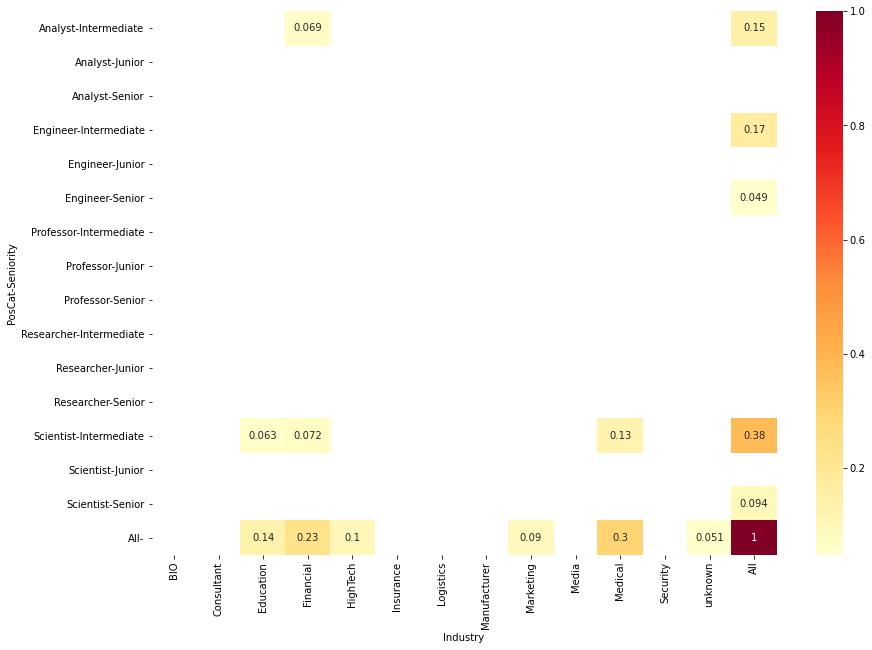

In [35]:
# filter data which score is less then 0.04
fig,ax=plt.subplots(figsize=(14,10))
sns.heatmap(pos_sen_ind, cmap='YlOrRd', annot=True,mask=pos_sen_ind<0.04)

In [36]:
ind_pos_sen=pd.crosstab([data.Industry, data.PosCat], data.Seniority, margins = True,normalize=True)
ind_pos_sen

Seniority                Intermediate    Junior    Senior       All
Industry     PosCat                                                
BIO          Analyst         0.000381  0.000191  0.000000  0.000572
             Engineer        0.001144  0.000191  0.000000  0.001334
             Researcher      0.000000  0.000000  0.000191  0.000191
             Scientist       0.005527  0.002287  0.002859  0.010673
Consultant   Analyst         0.003621  0.000000  0.001525  0.005146
             Engineer        0.003049  0.000000  0.000762  0.003812
             Researcher      0.000191  0.000000  0.000000  0.000191
             Scientist       0.002668  0.000381  0.000953  0.004002
Education    Analyst         0.012007  0.000381  0.001906  0.014294
             Engineer        0.016009  0.000191  0.003049  0.019249
             Researcher      0.004193  0.005908  0.004002  0.014103
             Scientist       0.063274  0.012579  0.012960  0.088813
Financial    Analyst         0.068611  0.006480  0.017153  0.092243
             Engineer        0.022870  0.000762  0.007623  0.031256
             Professor       0.000191  0.000000  0.000381  0.000572
             Researcher      0.005146  0.003240  0.001715  0.010101
             Scientist       0.072422  0.005146  0.017534  0.095102
HighTech     Analyst         0.009910  0.000191  0.002287  0.012388
             Engineer        0.034686  0.001525  0.010482  0.046693
             Professor       0.000381  0.000000  0.000000  0.000381
             Researcher      0.002859  0.000191  0.000381  0.003431
             Scientist       0.031256  0.000572  0.008005  0.039832
Insurance    Scientist       0.000762  0.000000  0.000191  0.000953
Logistics    Analyst         0.004383  0.000000  0.001334  0.005718
             Engineer        0.008386  0.000191  0.003240  0.011816
             Researcher      0.000191  0.000381  0.000191  0.000762
             Scientist       0.015247  0.000953  0.004574  0.020774
Manufacturer Analyst         0.000191  0.000000  0.000191  0.000381
             Engineer        0.001525  0.000000  0.000191  0.001715
             Researcher      0.000000  0.000191  0.000000  0.000191
             Scientist       0.001906  0.000762  0.001144  0.003812
Marketing    Analyst         0.015247  0.000762  0.004955  0.020964
             Engineer        0.016009  0.000191  0.004383  0.020583
             Researcher      0.000953  0.000572  0.000381  0.001906
             Scientist       0.034496  0.001525  0.010292  0.046312
Media        Analyst         0.000572  0.000000  0.000191  0.000762
             Engineer        0.006099  0.000000  0.001334  0.007433
             Scientist       0.004383  0.000762  0.001906  0.007052
Medical      Analyst         0.033162  0.001906  0.004193  0.039261
             Engineer        0.037164  0.001525  0.012769  0.051458
             Professor       0.000381  0.000572  0.000000  0.000953
             Researcher      0.017343  0.016009  0.003431  0.036783
             Scientist       0.127501  0.012769  0.030303  0.170574
Security     Analyst         0.000381  0.000000  0.000000  0.000381
             Engineer        0.002478  0.000000  0.000762  0.003240
             Scientist       0.001144  0.000000  0.000000  0.001144
unknown      Analyst         0.003431  0.000381  0.000953  0.004765
             Engineer        0.022680  0.000191  0.004383  0.027254
             Researcher      0.000191  0.000000  0.000000  0.000191
             Scientist       0.015437  0.000191  0.002859  0.018487
All                          0.732037  0.080046  0.187917  1.000000

<AxesSubplot:xlabel='Seniority', ylabel='Industry-PosCat'>

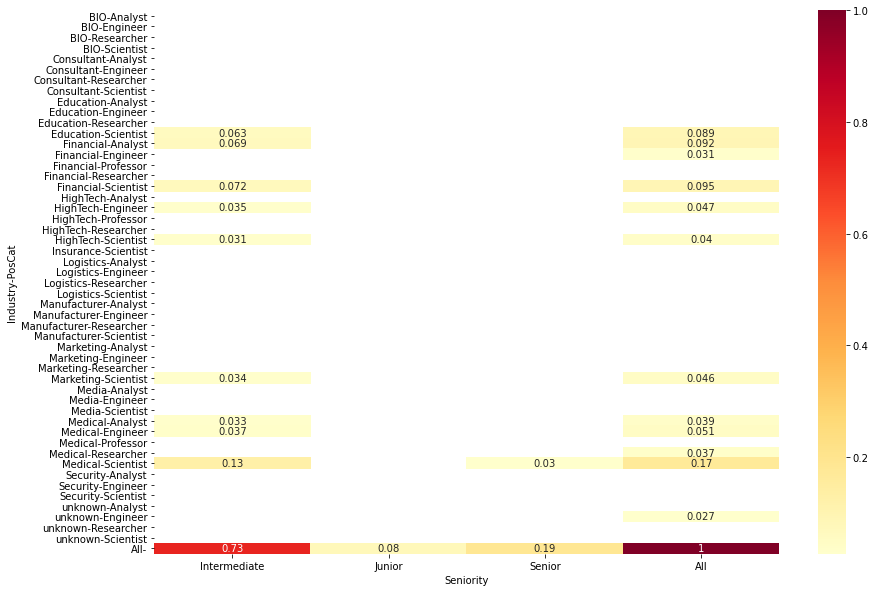

In [37]:
fig,ax=plt.subplots(figsize=(14,10))
sns.heatmap(ind_pos_sen, cmap='YlOrRd', annot=True,mask=ind_pos_sen<0.025)

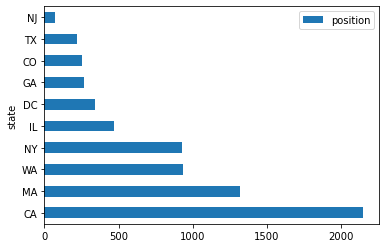

In [38]:
ax=state_pos.plot.barh(x='state',y='position')

In [39]:
state_pos

,state,position,company,description,reviews,location,PosCat,Seniority,Industry,HighestDegree
0,CA,2152,2152,2152,1547,2152,1717,2152,2152,2152
1,MA,1323,1323,1323,955,1323,975,1323,1323,1323
2,WA,935,935,935,804,935,632,935,935,935
3,NY,926,926,926,707,926,729,926,926,926
4,IL,471,471,471,381,471,335,471,471,471
5,DC,340,340,340,249,340,257,340,340,340
6,GA,269,269,269,227,269,208,269,269,269
7,CO,251,251,251,227,251,174,251,251,251
8,TX,218,218,218,176,218,161,218,218,218
9,NJ,68,68,68,53,68,59,68,68,68


In [40]:
def draw_pie_state_pos(labels,quants):
    plt.figure(1, figsize=(6,6))
    expl = [0,0,0,0,0,0,0,0,0,0]  
    colors  = ["lightblue","red","coral","green","yellow","orange",'pink', 'blue', 'purple', 'teal']
    plt.pie(quants, explode=expl, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)

In [41]:
state_pos['state']

0    CA
1    MA
2    WA
3    NY
4    IL
5    DC
6    GA
7    CO
8    TX
9    NJ
Name: state, dtype: object

In [42]:
labels=['CA', 'MA', 'WA', 'NY', 'IL', 'DC', 'GA', 'CO', 'TX', 'NJ']

In [43]:
quants=list(state_pos['position'])
quants

[2152, 1323, 935, 926, 471, 340, 269, 251, 218, 68]

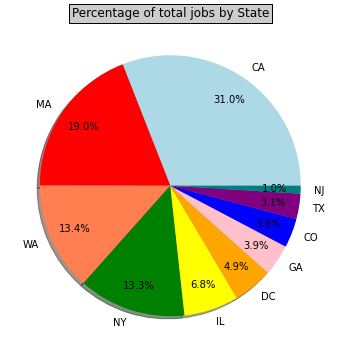

In [44]:
draw_pie_state_pos(labels,quants)
plt.title('Percentage of total jobs by State', bbox={'facecolor':'0.8', 'pad':3})
plt.show()

**STATE AND INDUSTRY**

In [45]:
# percentage of different industries in each state
state_industry=pd.crosstab(data.state,data.Industry).apply(lambda r: round(100*r/r.sum(),2),axis=1).reset_index()
state_industry

Industry,state,BIO,Consultant,Education,Financial,HighTech,Insurance,Logistics,Manufacturer,Marketing,Media,Medical,Security,unknown
0,CA,1.86,1.72,13.06,19.89,7.06,0.14,5.53,1.07,9.62,1.86,32.16,0.65,5.39
1,CO,0.00,0.80,3.59,4.38,69.72,0.00,3.98,0.00,3.59,0.00,12.35,0.00,1.59
2,DC,0.00,2.35,10.29,31.47,7.94,0.00,10.29,0.00,6.76,1.76,25.88,0.59,2.65
3,GA,0.37,3.35,15.24,33.09,6.32,0.00,5.20,0.00,10.78,1.86,21.56,0.37,1.86
4,IL,0.42,2.97,8.49,33.97,5.10,0.21,3.40,0.00,8.49,1.49,33.33,0.42,1.70
5,MA,2.57,0.98,19.58,15.80,5.52,0.00,2.34,0.91,6.35,0.53,39.46,0.38,5.59
6,NJ,1.47,1.47,10.29,29.41,2.94,0.00,2.94,0.00,13.24,1.47,33.82,0.00,2.94
7,NY,0.11,1.51,6.26,38.44,7.02,0.22,1.62,0.11,11.45,1.94,28.29,0.32,2.70
8,TX,0.00,1.38,17.89,22.02,9.17,0.00,3.67,0.00,11.01,3.21,26.61,0.00,5.05
9,WA,0.21,0.64,11.87,21.93,11.55,0.00,3.21,0.21,10.80,1.93,28.98,0.43,8.24


In [46]:


state_industry2 = state_industry.drop(['state'], axis = 1)

In [47]:
state_industry2

Industry,BIO,Consultant,Education,Financial,HighTech,Insurance,Logistics,Manufacturer,Marketing,Media,Medical,Security,unknown
0,1.86,1.72,13.06,19.89,7.06,0.14,5.53,1.07,9.62,1.86,32.16,0.65,5.39
1,0.00,0.80,3.59,4.38,69.72,0.00,3.98,0.00,3.59,0.00,12.35,0.00,1.59
2,0.00,2.35,10.29,31.47,7.94,0.00,10.29,0.00,6.76,1.76,25.88,0.59,2.65
3,0.37,3.35,15.24,33.09,6.32,0.00,5.20,0.00,10.78,1.86,21.56,0.37,1.86
4,0.42,2.97,8.49,33.97,5.10,0.21,3.40,0.00,8.49,1.49,33.33,0.42,1.70
5,2.57,0.98,19.58,15.80,5.52,0.00,2.34,0.91,6.35,0.53,39.46,0.38,5.59
6,1.47,1.47,10.29,29.41,2.94,0.00,2.94,0.00,13.24,1.47,33.82,0.00,2.94
7,0.11,1.51,6.26,38.44,7.02,0.22,1.62,0.11,11.45,1.94,28.29,0.32,2.70
8,0.00,1.38,17.89,22.02,9.17,0.00,3.67,0.00,11.01,3.21,26.61,0.00,5.05
9,0.21,0.64,11.87,21.93,11.55,0.00,3.21,0.21,10.80,1.93,28.98,0.43,8.24


In [48]:
CA = [blah for blah in state_industry2.loc[0]]
CO = [blah for blah in state_industry2.loc[1]]
DC = [blah for blah in state_industry2.loc[2]]
GA = [blah for blah in state_industry2.loc[3]]
IL = [blah for blah in state_industry2.loc[4]]
MA = [blah for blah in state_industry2.loc[5]]
NJ = [blah for blah in state_industry2.loc[6]]
NY = [blah for blah in state_industry2.loc[7]]
TX = [blah for blah in state_industry2.loc[8]]
WA = [blah for blah in state_industry2.loc[9]]



#BLAH by TIM GODFREY

In [54]:
WA

[0.21,
 0.64,
 11.87,
 21.93,
 11.55,
 0.0,
 3.21,
 0.21,
 10.8,
 1.93,
 28.98,
 0.43,
 8.24]

In [51]:
Bio = state_industry2['BIO']
Consulting = state_industry2['Consultant']
Education = state_industry2['Education']
Finance = state_industry2['Financial']
HighTech = state_industry2['HighTech']
Insurance = state_industry2['Insurance']
Logistics = state_industry2['Logistics']
Manufacturing = state_industry2['Manufacturer']
Marketing = state_industry2['Marketing']
Media = state_industry2['Media']
Medical = state_industry2['Medical']
Security = state_industry2['Security']
Other = state_industry2['unknown']

#list by industry 

In [66]:
Other

0    5.39
1    1.59
2    2.65
3    1.86
4    1.70
5    5.59
6    2.94
7    2.70
8    5.05
9    8.24
Name: unknown, dtype: float64

In [59]:
CA

[1.86,
 1.72,
 13.06,
 19.89,
 7.06,
 0.14,
 5.53,
 1.07,
 9.62,
 1.86,
 32.16,
 0.65,
 5.39]

In [ ]:
list(state_industry2.columns)

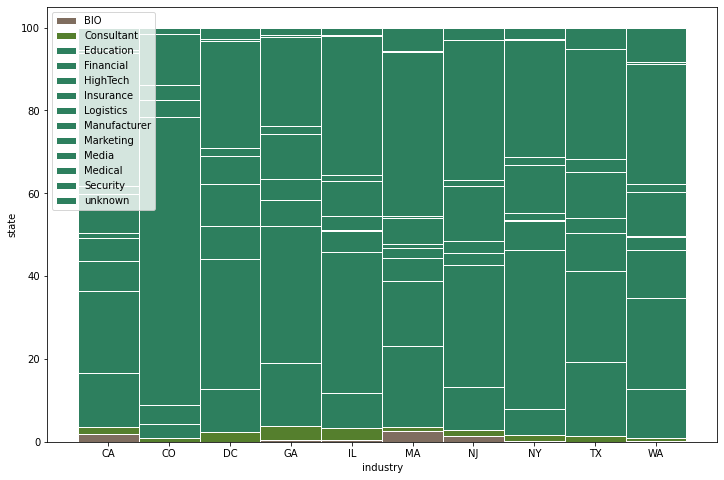

In [69]:
bars1 = Bio 
bars2 = Consulting 
bars3 = Education
bars4 = Finance
bars5 = HighTech  
bars6 = Insurance
bars7 = Logistics 
bars8 = Manufacturing 
bars9 = Marketing
bars10 = Media 
bars11 = Medical 
bars12 = Security 
bars13 = Other 

classes_names = list(state_industry2.columns)
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
barsa = np.add(bars, bars3).tolist()
barsb = np.add(barsa, bars4).tolist()
barsc = np.add(barsb, bars5).tolist()
barsd = np.add(barsc, bars6).tolist()
barse = np.add(barsd, bars7).tolist()
barsf = np.add(barse, bars8).tolist()
barsg = np.add(barsf, bars9).tolist()
barsh = np.add(barsg, bars10).tolist()
barsi = np.add(barsh, bars11).tolist()
barsj = np.add(barsi, bars12).tolist()

 
# The position of the bars on the x-axis
r = ('CA', 'CO', 'DC', 'GA', 'IL', 'MA', 'NJ', 'NY', 'TX', 'WA')
 
# Names of group and bar width
#names = ['A','B','C','D','E']
barWidth = 1


fig, ax = plt.subplots(figsize=(12,8))
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars4, bottom=barsa, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars5, bottom=barsb, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars6, bottom=barsc, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars7, bottom=barsd, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars8, bottom=barse, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars9, bottom=barsf, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars10, bottom=barsg, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars11, bottom=barsh, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars12, bottom=barsi, color='#2d7f5e', edgecolor='white', width=barWidth)
plt.bar(r, bars13, bottom=barsj, color='#2d7f5e', edgecolor='white', width=barWidth)

plt.legend(classes_names,loc=2)
# Custom X axis
plt.ylabel('state')
plt.xlabel('industry')
 
# Show graphic
plt.show()

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (10).

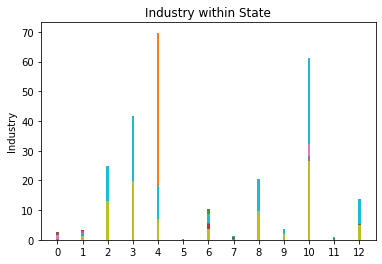

In [58]:
import numpy as np
import matplotlib.pyplot as plt


N = 13
ind = np.arange(N)    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, CA, width)
p2 = plt.bar(ind, CO, width)
p3 = plt.bar(ind, DC, width)
p4 = plt.bar(ind, GA, width)
p5 = plt.bar(ind, IL, width)
p6 = plt.bar(ind, MA, width)
p7 = plt.bar(ind, NJ, width)
p8 = plt.bar(ind, NY, width)
p9 = plt.bar(ind, TX, width)
p10 = plt.bar(ind, WA, width, bottom=CA) 

plt.ylabel('Industry')
plt.title('Industry within State')
plt.xticks(ind, ('CA', 'CO', 'DC', 'GA', 'IL', 'MA', 'NJ', 'NY', 'TX', 'WA'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0], p10[0]), 
           ('CA', 'CO', 'DC', 'GA', 'IL', 'MA', 'NJ', 'NY', 'TX', 'WA'))

plt.show()

<AxesSubplot:xlabel='state', ylabel='Financial'>

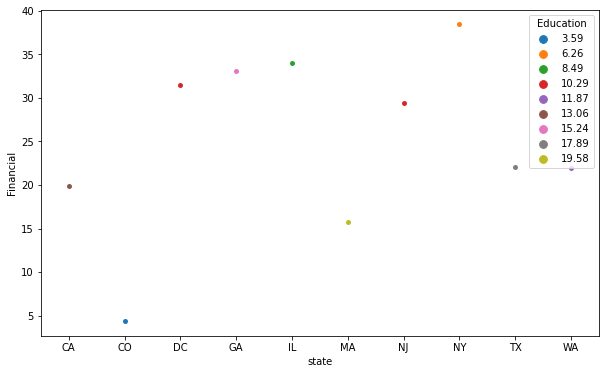

In [35]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='state', y='Financial',hue="Education",data=state_industry)

**INDUSTRY IN CALIFORNIA**

In [36]:
def draw_pieCA(labels,quants):
    plt.figure(1, figsize=(6,6))
    expl = [0,0,0,0.1,0,0,0,0,0,0,0.2,0,0]  
    colors  = ["lightblue","red","coral","green","yellow","orange",'pink']
    plt.pie(quants, explode=expl, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)

In [37]:
state_industry.columns

Index(['state', 'BIO', 'Consultant', 'Education', 'Financial', 'HighTech',
       'Insurance', 'Logistics', 'Manufacturer', 'Marketing', 'Media',
       'Medical', 'Security', 'unknown'],
      dtype='object', name='Industry')

In [38]:
labels=['BIO', 'Consultant', 'Education', 'Financial', 'HighTech',
       'Insurance', 'Logistics', 'Manufacturer', 'Marketing', 'Media',
       'Medical', 'Security', 'unknown']

In [39]:
quants=list(state_industry.iloc[0,1:])
quants

[1.86,
 1.72,
 13.06,
 19.89,
 7.06,
 0.14,
 5.53,
 1.07,
 9.62,
 1.86,
 32.16,
 0.65,
 5.39]

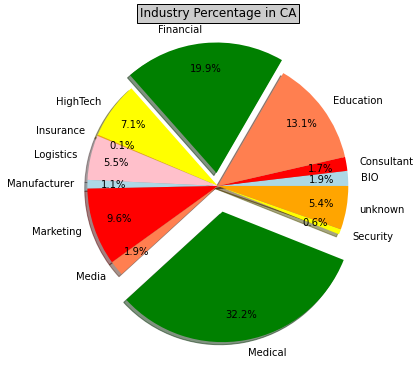

In [40]:
draw_pieCA(labels,quants)
plt.title('Industry Percentage in CA', bbox={'facecolor':'0.8', 'pad':3})
plt.show()

**INDUSTRY IN COLORADO**

In [41]:
def draw_pieCO(labels,quants):
    plt.figure(1, figsize=(6,6))
    expl = [0,0,0,0,0.2,0,0,0,0,0,0.1,0,0]  
    colors  = ["lightblue","red","coral","green","yellow","orange",'pink']
    plt.pie(quants, explode=expl, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)

In [42]:
quants=list(state_industry.iloc[1,1:])
quants

[0.0, 0.8, 3.59, 4.38, 69.72, 0.0, 3.98, 0.0, 3.59, 0.0, 12.35, 0.0, 1.59]

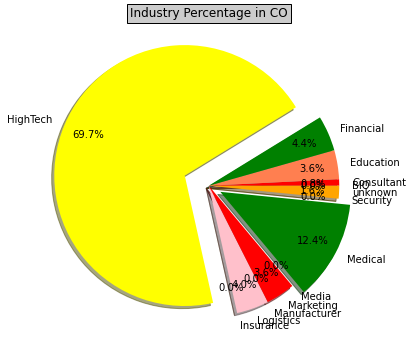

In [43]:
draw_pieCO(labels,quants)
plt.title('Industry Percentage in CO', bbox={'facecolor':'0.8', 'pad':3})
plt.show()

**INDUSTRY IN GEORGIA**

In [44]:
def draw_pieGA(labels,quants):
    plt.figure(1, figsize=(6,6))
    expl = [0,0,0,0.2,0,0,0,0,0,0,0.1,0,0]  
    colors  = ["lightblue","red","coral","green","yellow","orange",'pink']
    plt.pie(quants, explode=expl, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)

In [45]:
quants=list(state_industry.iloc[3,1:])
quants

[0.37, 3.35, 15.24, 33.09, 6.32, 0.0, 5.2, 0.0, 10.78, 1.86, 21.56, 0.37, 1.86]

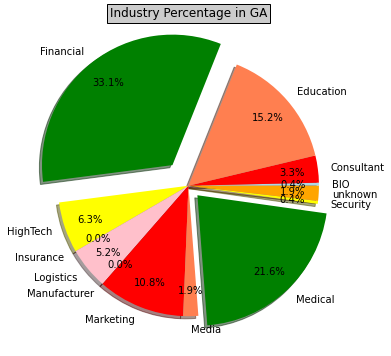

In [46]:
draw_pieGA(labels,quants)
plt.title('Industry Percentage in GA', bbox={'facecolor':'0.8', 'pad':3})
plt.show()

In [47]:
sns.pairplot(state_industry)

Error in callback <function flush_figures at 0x1a1dd04f80> (for post_execute):


KeyboardInterrupt: 

In [48]:
industry_poscat=pd.crosstab(data.Industry,data.PosCat).apply(lambda r: round(100*r/r.sum(),2),axis=1)
industry_poscat

PosCat,Analyst,Engineer,Professor,Research,Scientist
Industry,,,,,
BIO,4.48,10.45,0.00,1.49,83.58
Consultant,39.13,28.99,0.00,1.45,30.43
Education,10.47,14.11,0.00,10.34,65.08
Financial,40.23,13.63,0.25,4.41,41.48
HighTech,12.06,45.45,0.37,3.34,38.78
Insurance,0.00,0.00,0.00,0.00,100.00
Logistics,14.63,30.24,0.00,1.95,53.17
Manufacturer,6.25,28.12,0.00,3.12,62.50
Marketing,23.35,22.93,0.00,2.12,51.59


In [49]:
industry_degree=pd.crosstab(data.Industry,data.HighestDegree).apply(lambda r: round(100*r/r.sum(),2),axis=1)
industry_degree

HighestDegree,Bachelor,Master,PhD,unknown
Industry,,,,
BIO,4.94,67.90,22.22,4.94
Consultant,4.67,84.11,11.21,0.00
Education,3.41,63.52,31.14,1.93
Financial,3.74,74.46,20.27,1.53
HighTech,2.11,70.74,26.70,0.45
Insurance,0.00,50.00,50.00,0.00
Logistics,2.50,73.21,23.21,1.07
Manufacturer,0.00,73.68,23.68,2.63
Marketing,4.43,70.09,22.47,3.01


In [50]:
pos_degree=pd.crosstab(data.PosCat,data.HighestDegree).apply(lambda r: round(100*r/r.sum(),2),axis=1)
pos_degree

HighestDegree,Bachelor,Master,PhD,unknown
PosCat,,,,
Analyst,5.71,82.96,8.71,2.61
Engineer,2.19,79.83,16.37,1.60
Professor,10.00,70.00,20.00,0.00
Research,5.34,65.45,27.53,1.69
Scientist,2.18,54.71,41.23,1.88


In [51]:
state_poscat=pd.crosstab(data.state,data.PosCat).apply(lambda r: round(100*r/r.sum(),2),axis=1)
state_poscat

PosCat,Analyst,Engineer,Professor,Research,Scientist
state,,,,,
CA,13.80,23.18,0.17,4.66,58.18
CO,8.62,74.14,1.15,2.87,13.22
DC,49.81,14.01,0.39,1.95,33.85
GA,27.40,20.19,0.96,4.33,47.12
IL,36.42,20.00,0.30,6.57,36.72
MA,13.74,16.31,0.10,13.03,56.82
NJ,8.47,1.69,0.00,3.39,86.44
NY,31.69,10.01,0.00,5.76,52.54
TX,20.50,21.74,0.00,1.86,55.90


,state,position,company,description,reviews,location,PosCat,Seniority,Industry,HighestDegree
0,CA,2152,2152,2152,1547,2152,1717,2152,2152,2152
1,MA,1323,1323,1323,955,1323,975,1323,1323,1323
2,WA,935,935,935,804,935,632,935,935,935
3,NY,926,926,926,707,926,729,926,926,926
4,IL,471,471,471,381,471,335,471,471,471
5,DC,340,340,340,249,340,257,340,340,340
6,GA,269,269,269,227,269,208,269,269,269
7,CO,251,251,251,227,251,174,251,251,251
8,TX,218,218,218,176,218,161,218,218,218
9,NJ,68,68,68,53,68,59,68,68,68
